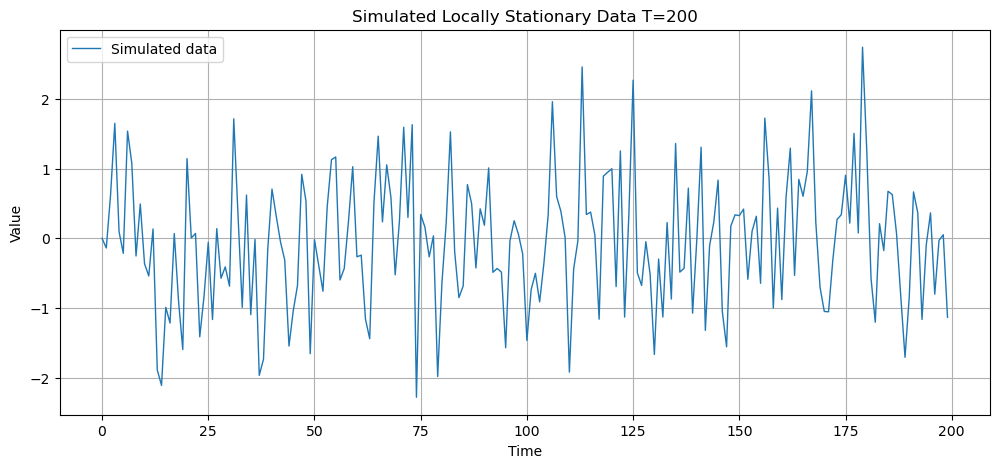

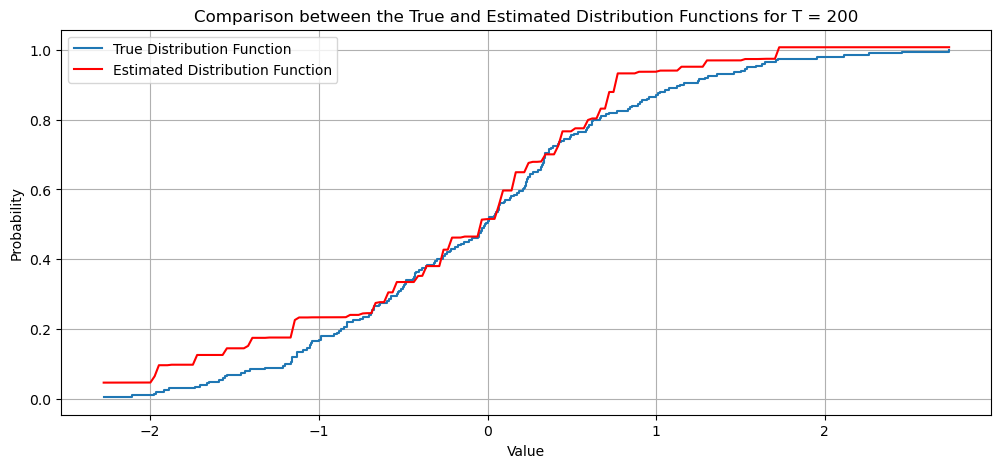

1-Wasserstein distance:  0.10839365228456437
Expected 1-Wasserstein distance:  0.0005419682614228219


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x):
    Xbar = np.sum(X[t-1])/T
    h1 = 4/math.sqrt(12)*(T ** (-(1/5)))
    h2 = 4*math.sqrt((1/(T-1))*np.sum((X[t-1] - Xbar)**2))*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Define the time-varying parameter
def time_varying_param(t):
    phi = 0.2 + 0.3 * np.sin(0.1 * t/T)
    return phi

# Simulate the time-varying AR(1) model
def simulate_tv_ar(T, param_func):
    epsilon = np.random.normal(0, 1, T)
    Y = np.zeros(T)
    
    for t in range(1, T):
        phi = param_func(t)
        Y[t] = phi * Y[t-1] + epsilon[t]
    
    return Y

#Example

# Parameters
T = 200  # Length of time series
d = 1  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = simulate_tv_ar(T, time_varying_param)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=200")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5)
#print(F)
F_values1 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF1, where='post', label='True Distribution Function')
plt.plot(v_values, F_values1, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for T = 200")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF1
dist2 = F_values1

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
mean_W1 = W1/T
print("1-Wasserstein distance: ", W1)
print("Expected 1-Wasserstein distance: ", mean_W1)


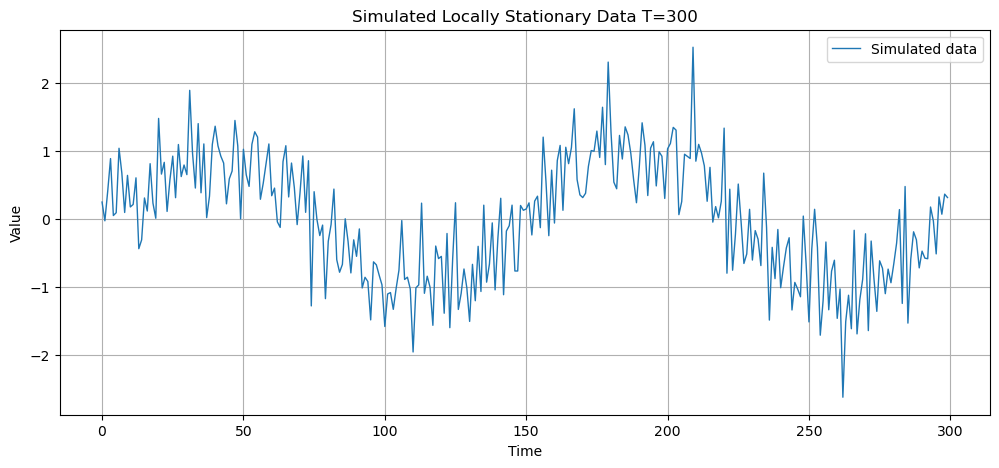

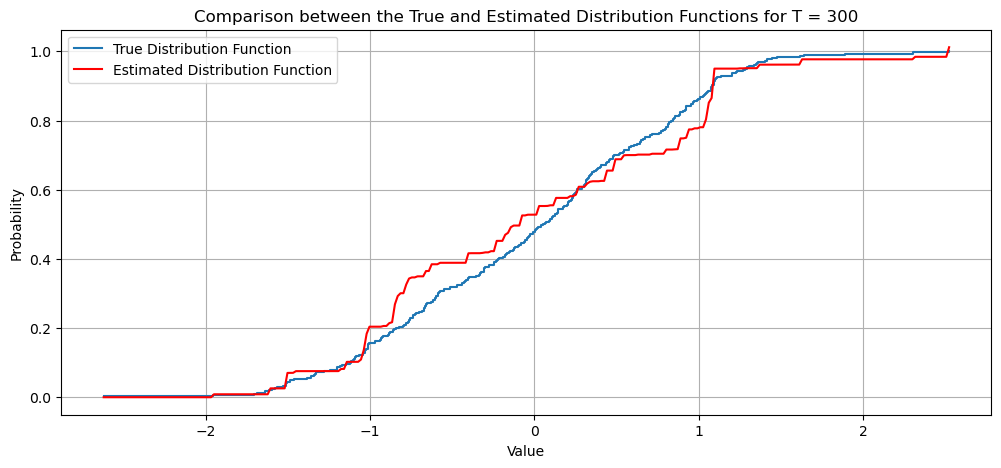

1-Wasserstein distance:  0.09002713588387698
Expected 1-Wasserstein distance:  0.0003000904529462566


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x):
    Xbar = np.sum(X[t-1])/T
    h1 = 5/math.sqrt(12)*(T ** (-(1/5)))
    h2 = 5*math.sqrt((1/(T-1))*np.sum((X[t-1] - Xbar)**2))*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 300  # Length of time series
d = 1  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=300")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5)
#print(F)
F_values2 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF2 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF2, where='post', label='True Distribution Function')
plt.plot(v_values, F_values2, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for T = 300")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF2
dist2 = F_values2

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
mean_W1 = W1/T
print("1-Wasserstein distance: ", W1)
print("Expected 1-Wasserstein distance: ", mean_W1)


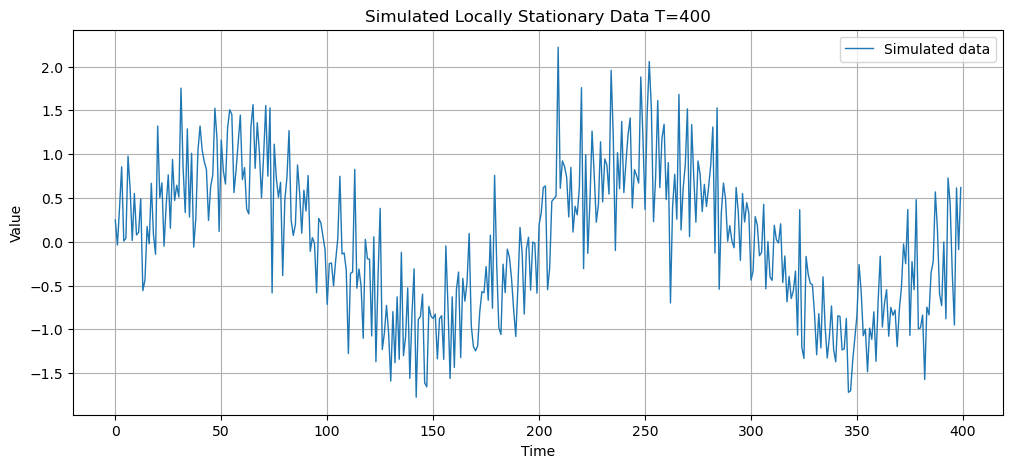

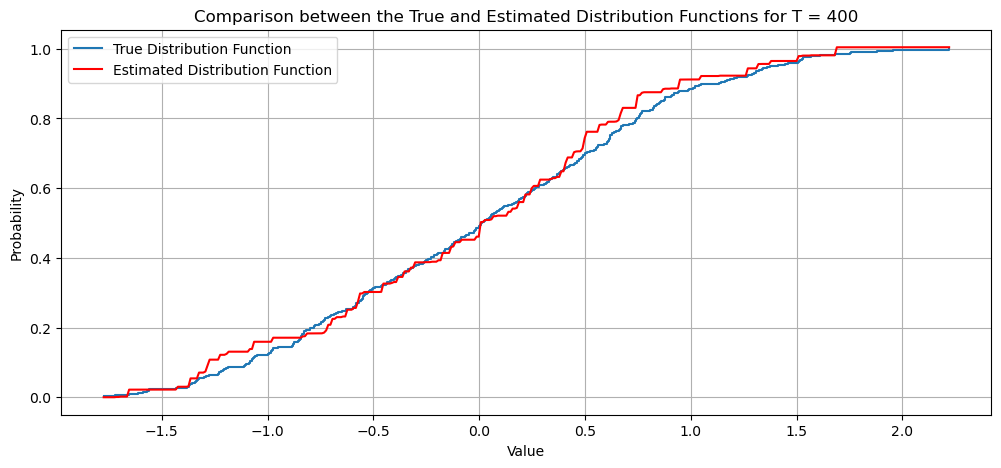

1-Wasserstein distance:  0.08932929612983051
Expected 1-Wasserstein distance:  0.00022332324032457628


In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x):
    Xbar = np.sum(X[t-1])/T
    h1 = 6/math.sqrt(12)*(T ** (-(1/5)))
    h2 = 6*math.sqrt((1/(T-1))*np.sum((X[t-1] - Xbar)**2))*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 400  # Length of time series
d = 1  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=400")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5)
#print(F)
F_values3 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF3 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF3, where='post', label='True Distribution Function')
plt.plot(v_values, F_values3, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for T = 400")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF3
dist2 = F_values3

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
mean_W1 = W1/T
print("1-Wasserstein distance: ", W1)
print("Expected 1-Wasserstein distance: ", mean_W1)


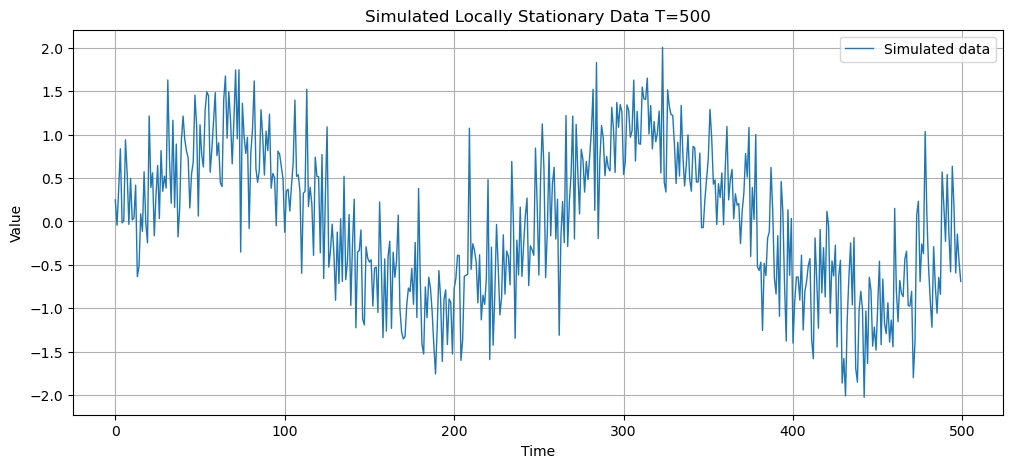

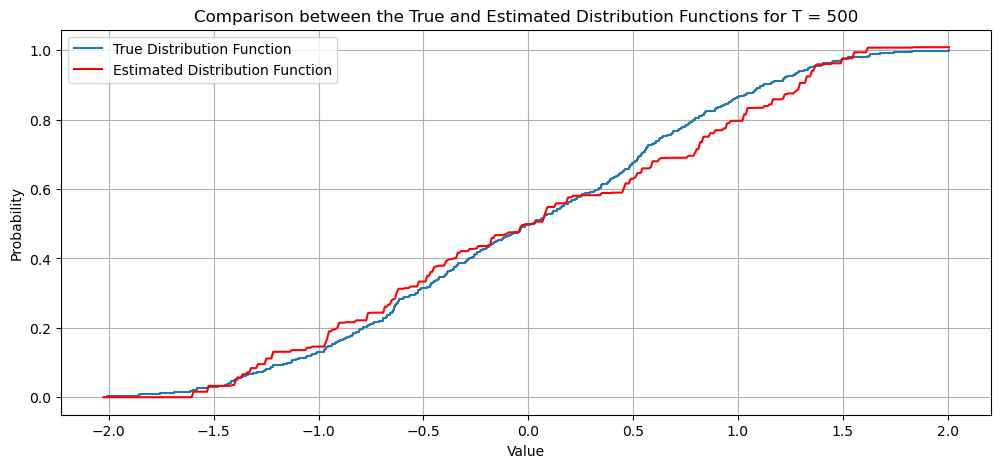

1-Wasserstein distance:  0.052894330199246345
Expected 1-Wasserstein distance:  0.00010578866039849268


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x):
    Xbar = np.sum(X[t-1])/T
    h1 = 8/math.sqrt(12)*(T ** (-(1/5)))
    h2 = 8*math.sqrt((1/(T-1))*np.sum((X[t-1] - Xbar)**2))*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 500  # Length of time series
d = 1  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=500")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5)
#print(F)
F_values4 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF4 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF4, where='post', label='True Distribution Function')
plt.plot(v_values, F_values4, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for T = 500")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF4
dist2 = F_values4

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
mean_W1 = W1/T
print("1-Wasserstein distance: ", W1)
print("Expected 1-Wasserstein distance: ", mean_W1)


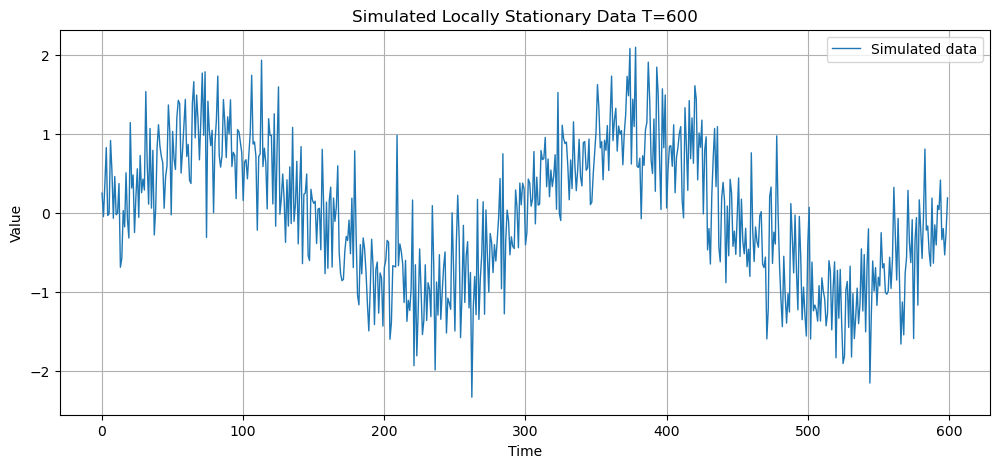

KeyboardInterrupt: 

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x):
    Xbar = np.sum(X[t-1])/T
    h1 = 8/math.sqrt(12)*(T ** (-(1/5)))
    h2 = 8*math.sqrt((1/(T-1))*np.sum((X[t-1] - Xbar)**2))*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 600  # Length of time series
d = 1  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=600")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5)
#print(F)
F_values5 = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF5= np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF5, where='post', label='True Distribution Function')
plt.plot(v_values, F_values5, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for T = 600")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF5
dist2 = F_values5

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
mean_W1 = W1/T
print("1-Wasserstein distance: ", W1)
print("Expected 1-Wasserstein distance: ", mean_W1)


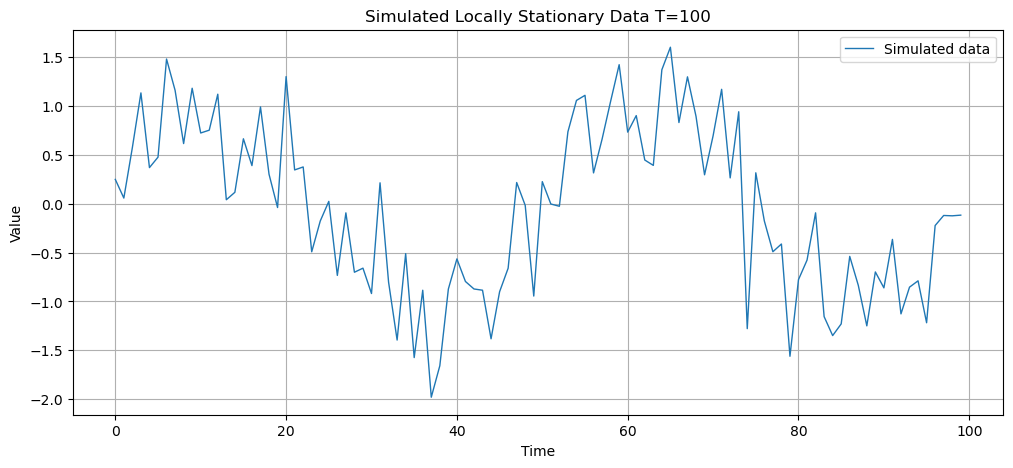

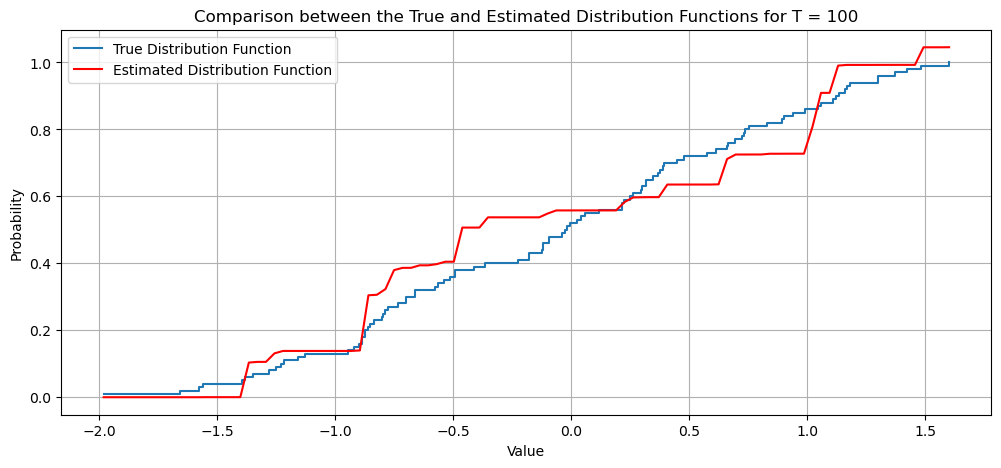

1-Wasserstein distance:  0.06474798606859936
Expected 1-Wasserstein distance:  0.0006474798606859936


In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Define the weight function
def omega(t, u, x):
    Xbar = np.sum(X[t-1])/T
    h1 = 3/math.sqrt(12)*(T ** (-(1/5)))
    h2 = 3*math.sqrt((1/(T-1))*np.sum((X[t-1] - Xbar)**2))*(T ** (-(1/5)))
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

def ecdf(u, x, v):
    weights = np.array([omega(t, u, x) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

#Example

# Parameters
T = 100  # Length of time series
d = 1  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Simulated data", linewidth=1)
plt.title("Simulated Locally Stationary Data T=100")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5])

weights = [omega(t, u_test, x_test) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
#plt.figure(figsize=(12, 5))
#plt.plot(weights, label="Weights for (u, x) = (0.5, 0.5)", linewidth=1)
#plt.title("Weights ω_t(u, x)")
#plt.xlabel("t")
#plt.ylabel("ω_t")
#plt.legend()
#plt.grid(True)
#plt.show()

#Values for plotting
v_values = np.linspace(Y.min(), Y.max(), T)
#F=ecdf(u_test, x_test, 1.5)
#print(F)
F_values = [ecdf(u_test, x_test, v) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
True_CDF= np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)

#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, True_CDF, where='post', label='True Distribution Function')
plt.plot(v_values, F_values, label="Estimated Distribution Function", color='red')
plt.title("Comparison between the True and Estimated Distribution Functions for T = 100")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


# Define two probability distributions (as arrays)
dist1 = True_CDF
dist2 = F_values

# Compute the 1-Wasserstein distance and its expectation
W1 = wasserstein_distance(dist1, dist2)
mean_W1 = W1/T
print("1-Wasserstein distance: ", W1)
print("Expected 1-Wasserstein distance: ", mean_W1)
